In [163]:
import pandas as pd
import numpy as np

In [164]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [165]:
csv = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [166]:
data = pd.DataFrame(csv)

In [167]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Windows\Temp\ipykernel_3464\3448165721.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], bins=30)


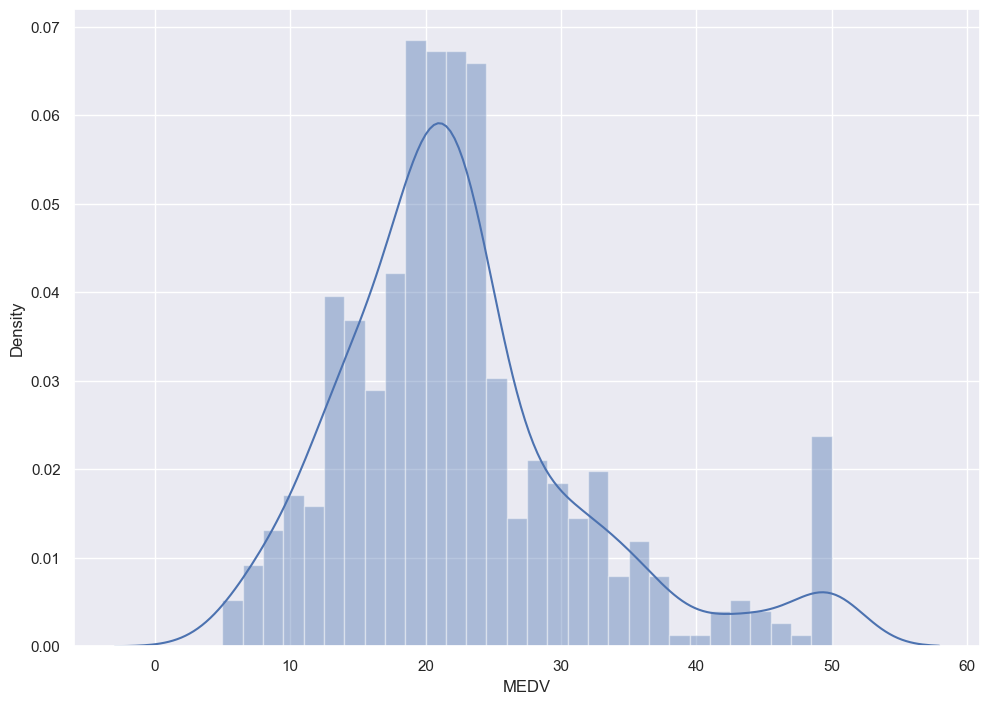

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

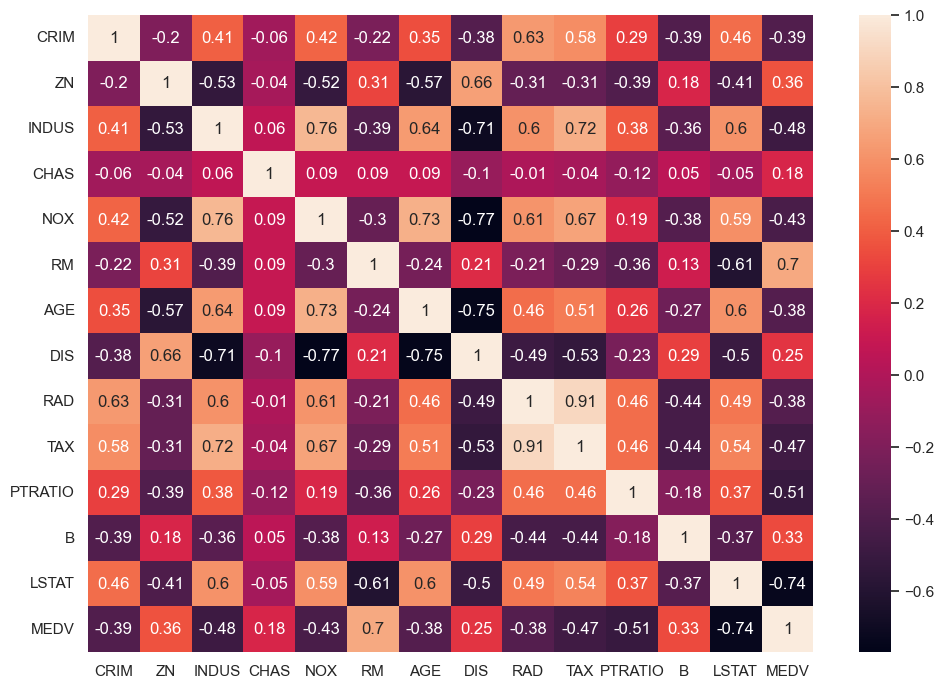

In [169]:
import seaborn as sns

correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [170]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Normalization**

In [171]:
data =(data-data.mean())/data.std()

**Train-Test-Validation splitting**

In [172]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, :13].values
y = data.iloc[:, 13:].values 
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [173]:
def my_softmax(z):  
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [174]:
def relu(x):
	return max(0.0, x)

In [175]:
def sigmoid(self, z):
        return 1/(1+np.exp(-z))

In [176]:
def dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zero(units)

    for j in range(units):
        w = W[:j]
        z = np.dot(w,a_in) + b[j]
        a_out[j] = g(z)
    
    return a_out

In [177]:
def sequential(x):
    a1 = dense(x,W1,b1)
    a2 = dense(a1,W2,b2)
    a3 = dense(a2,W3,b3)
    a4 = dense(a3,W4,b4)
    f_x = a4
    return f_x

In [178]:
arr = []
for i in range(data.shape[0]):
    arr.append(data.iloc[i].to_numpy())

In [179]:
vector = np.array(arr)

In [180]:
import random

parameters = {
    '#neuron' : [1,2,3,4,5,6,7,8,9,10],
    'activation function' : [sigmoid,my_softmax,relu],
    'weights' : np.arange(0.0, 1.1, 0.1),
    'num_x' : random.randint(1,13)
}

In [181]:
w1 = np.random.randn(13,10)/np.sqrt(23)
b1 = np.zeros(10)
w2 = np.random.randn(10,1)/np.sqrt(10+1)
b2 = 0

In [182]:
def feed_forward(x, w1, b1, w2, b2):
    z_out = np.maximum((x.dot(w1)+b1), 0)          # relu nonlinearity
    return (z_out.dot(w2)+b2), z_out

In [183]:
def cost(T, Y):
    return  ((T-Y)*(T-Y)).sum()/data.shape[0]

In [184]:
train_cost = []
test_cost = []

In [185]:
lr =  0.01                            # Learning Rate
reg = 0                               # Regularization 

In [186]:
# For batch gradient descent
iter = 1000                                         # No. of iteration
batch_size = 300                                    # Batch Size
n_batches = np.round(len(train)/batch_size)        # No. of batches
n_batches = n_batches.astype(int)

In [187]:
def hypothesis(X, theta):
    return np.dot(X, theta)
    
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
 

In [188]:
def create_mini_batches(X, y, batch_size=batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [189]:
def gradientDescent(X, y, learning_rate=lr, batch_size=batch_size):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    for itr in range(iter):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
 
    return theta, error_list

Bias =  [nan]
Coefficients =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


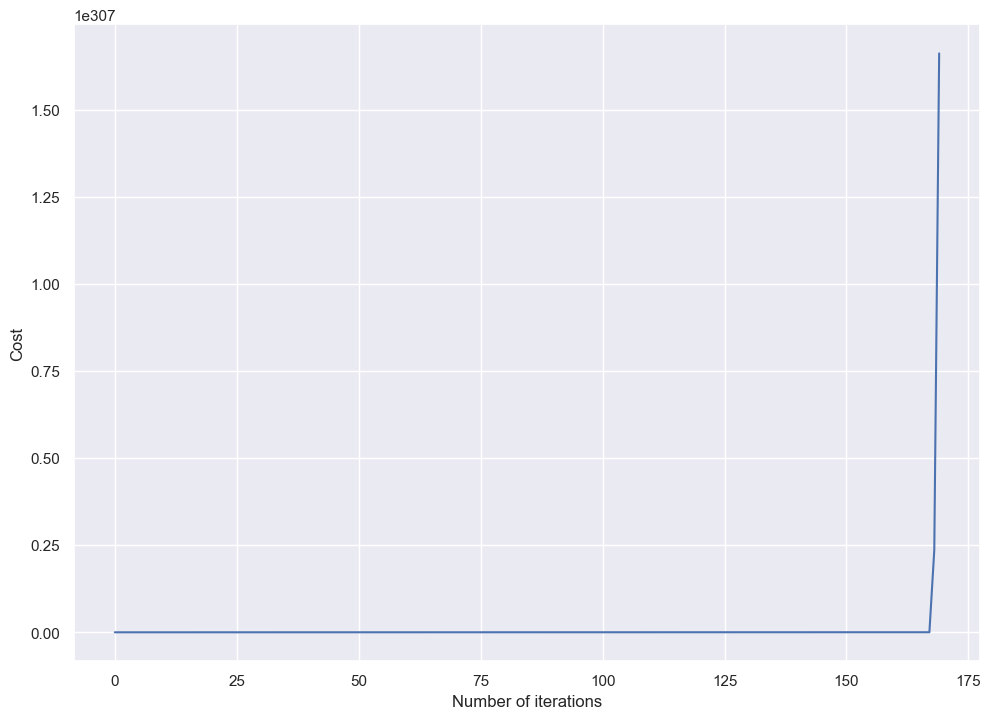

In [191]:
theta, error_list = gradientDescent(xtrain, ytrain)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])
 
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [195]:
ytest_pred, ztest = feed_forward(xtest, w1, b1, w2, b2)

d1 = ytest-ytest_pred
d2 = ytest-ytest.mean()
r2 = 1-d1.T.dot(d1)/d2.T.dot(d2)

print(r2)


[[-0.31995622]]
